<a href="https://colab.research.google.com/github/vivek16pawar/Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

ML PipeLine
- Importing Libraries
- Downloading Data
- Checking Data
- Some Data Manuplation
- Exploraitory Data Analysis
- Identify Dependent and Independent Variable
- Select Algorithim suitable for problem
- Feature Engineering
- Split data into Train And Test
- Get Numerical and Categorical Variable
- Check Missing Value and do impution
- Standardize the numerical variable
- Encoding Categorical Variable
- Building and Training Model
- Validating the model
- Compating with Base Line Model
- Hyper Parameter Tunning
- Putting parameter together and Making Predictions

##Importing Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


##Downloading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ross_df = pd.read_csv('/content/drive/MyDrive/Module 4/Rental Sales Prediction/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Module 4/Rental Sales Prediction/ store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Checking Data

In [5]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
merge_df = ross_df.merge(store_df,on='Store',how='left')

In [8]:
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [10]:
merge_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


#Data Manupilation

In [11]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    df['day'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week

In [12]:
split_date(merge_df)

In [13]:
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,weekofyear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


# Exploraitory Data Analysis

## When Store are Closed ?

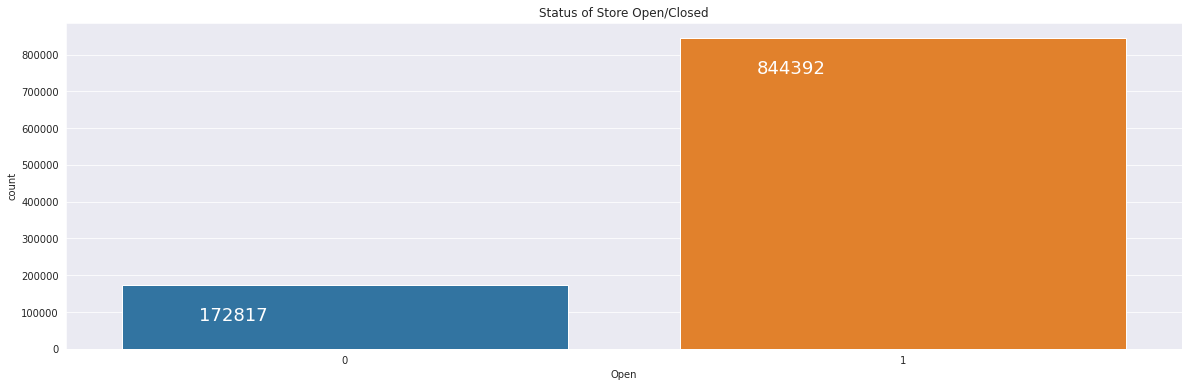

In [14]:
# Getting Status of Store Wheather it is Open or Closed
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Status of Store Open/Closed")
ax = sns.countplot(x = 'Open', data = merge_df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

Over those two years, 172817 is the number of times that different stores closed on given days.

In [15]:
# Total days store closed when there is school holiday
merge_df[(merge_df.Open == 0) & (merge_df.SchoolHoliday == 1) & (merge_df.StateHoliday == '0') ].count()[0]

2263

From those closed events, 2263 times occured because there was a school holiday.

In [16]:
merge_df[(merge_df.Open == 0) &
         ((merge_df.StateHoliday == 'a') |
          (merge_df.StateHoliday == 'b') | 
          (merge_df.StateHoliday == 'c'))].count()[0]

30140

For Closed Event 30140 times it occured because of either a bank holiday or easter or christmas.

In [17]:
merge_df[(merge_df.Open == 0) & (merge_df.SchoolHoliday == 0) & (merge_df.StateHoliday == '0')].count()[0]

121482

- After reading the descrition of the this task, Rossman clearly stated that they were undergoing refurbishments sometimes and had to close. Most probably those were the times this event was happening.

- The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

## Effect of running Promotional Ads on Sales

In [18]:
100*merge_df.Promo.value_counts()/len(merge_df.Promo)

0    61.848548
1    38.151452
Name: Promo, dtype: float64

Around 62% Stores were not running promotion on that day

In [19]:
# Average Sales when there is no promotional camapagin running
Sales_with_no_promo = merge_df[(merge_df.Promo == 0) & (merge_df.Sales)].mean().sort_values(ascending = False)[0]
print(Sales_with_no_promo)

5928.965569239575


In [20]:
# Average Sales when there is promotional camapagin running
Sales_with_promo = merge_df[(merge_df.Promo == 1) & (merge_df.Sales)].mean().sort_values(ascending = False)[0]
print(Sales_with_promo)

8223.920367241544


Analysis clearly states that if we run promotional advertisment then there is jump in average sales, So we can say running promotion is benefical for stores.

## Promotional Ads and Customers Count

In [21]:
# Customers Count when there is no promotional ads running
no_ads_cust = merge_df[(merge_df.Promo == 0) & (merge_df.Customers)].mean()[3]

In [22]:
# Customers Count when there is promotional ads running
ads_cust = merge_df[(merge_df.Promo == 1) & (merge_df.Customers)].mean()[3]

In [23]:
percentage_increase_cust = 100*(ads_cust - no_ads_cust)/(ads_cust + no_ads_cust)
print(percentage_increase_cust)

9.665641134987318


Running promotional ads gives 9% hike in customers

###Percentage Shop Running continous Promotions

In [24]:
merge_df.count(0)/merge_df.shape[0]*100

Store                        100.000000
DayOfWeek                    100.000000
Date                         100.000000
Sales                        100.000000
Customers                    100.000000
Open                         100.000000
Promo                        100.000000
StateHoliday                 100.000000
SchoolHoliday                100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.740270
CompetitionOpenSinceMonth     68.212236
CompetitionOpenSinceYear      68.212236
Promo2                       100.000000
Promo2SinceWeek               50.056380
Promo2SinceYear               50.056380
PromoInterval                 50.056380
year                         100.000000
month                        100.000000
day                          100.000000
weekofyear                   100.000000
dtype: float64

The Promo2SinceWeek,Promo2SinceYear and PromoInterval variables has almost 51% fill rate since they are actually NULL values because there are no continuous promotion for those stores

## Competition Distance vs Customers

In [25]:
merge_df[(merge_df.CompetitionDistance <= 500) & (merge_df.Sales)].mean()[2]

7612.162124854226

In [26]:
merge_df[(merge_df.CompetitionDistance.between(500,1000,inclusive = 'both')) & (merge_df.Sales)].mean()[2]

6688.99402617106

In [27]:
merge_df[(merge_df.CompetitionDistance < 2000) & (merge_df.Customers)].mean()[3]

881.9547414020258

# Best Store Type

In [28]:
merge_df['SalesperCustomer'] = merge_df.Sales/merge_df.Customers

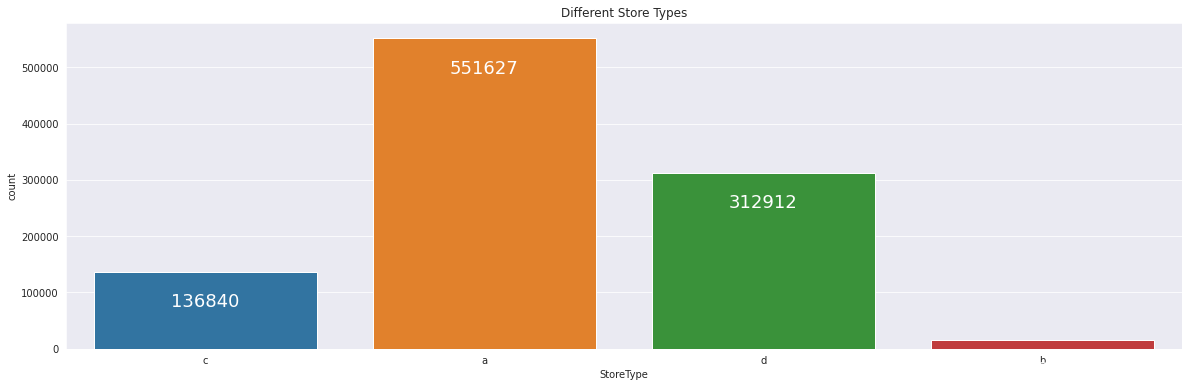

In [64]:
# Number of stores per type
sns.set_style('darkgrid')
sns.color_palette("hls", 8)
plt.figure(figsize=(20,6))
plt.title("Different Store Types")
ax = sns.countplot(x = 'StoreType', data = merge_df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+0.8), ha='center', va='top', color='white', size=18)
plt.show()

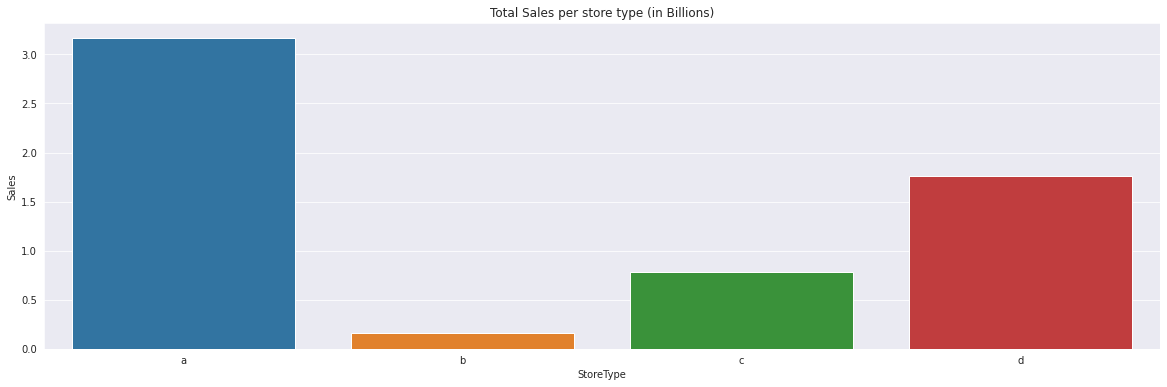

In [66]:
# Total Sales per store type
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Total Sales per store type (in Billions)")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Sales.index,merge_df.groupby(by="StoreType").sum().Sales/1e9,errwidth=0)



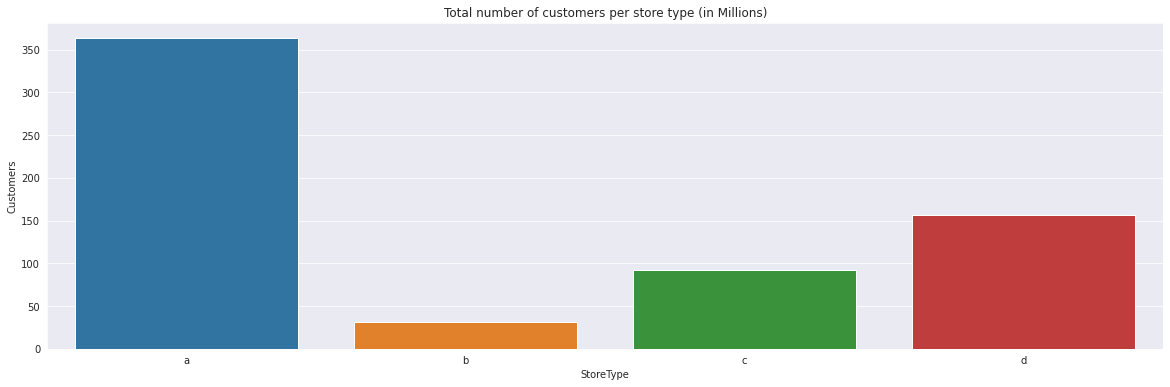

In [51]:
# Number of customer per store type

sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Total number of customers per store type (in Millions)")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Customers.index,merge_df.groupby(by="StoreType").sum().Customers/1e6,errwidth=0)



In [32]:
#Avg Sales per store type


In [33]:
#Avg customer per store type

In [34]:
#Avg customer spending per store type

In [35]:
# Total promotion per store type